In [32]:
from PIL import Image

image = Image.open('perfil.jpg')
print(f"Original size : {image.size}") # 5464x3640

perfil_resized = image.resize((128, 128))
perfil_resized.save('perfil_128.jpeg')

Original size : (640, 640)


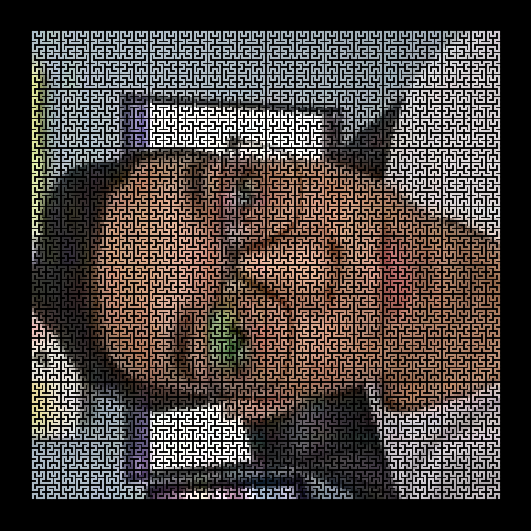

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

from hilbert import decode

num_dims = 2

def draw_curve(fig, num_bits):
    #read imagem to color
    img = imread('perfil_128.jpeg')

    # The maximum Hilbert integer.
    max_h = 2**(num_bits*num_dims)

    # Generate a sequence of Hilbert integers.
    hilberts = np.arange(max_h)

    # Compute the 2-dimensional locations.
    locs = decode(hilberts, num_dims, num_bits)

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()

    # Draw. This may be a little slow.
    for ii in range(max_h-1):
        ax.plot([locs[ii,0], locs[ii+1,0]],
        [locs[ii,1], locs[ii+1,1]],
        '-', color = '#%02x%02x%02x' % (img[locs[ii][0]][locs[ii][1]][0],img[locs[ii][0]][locs[ii][1]][1] , img[locs[ii][0]][locs[ii][1]][2]))
        ax.set_aspect('equal')

    fig.add_axes(ax)

fig = plt.figure(figsize=(5.12,5.12), dpi=100, facecolor='black')
draw_curve(fig, 7)
plt.savefig('Perfil_Hilbert.png', dpi=100)